In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [71]:
credito = pd.read_csv("Credit.csv")
credito.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [73]:
previsores = credito.iloc[:,0:20].values
classe = credito.iloc[:,20].values

In [75]:
colunas_categoricas = [0, 2, 3, 5, 6, 8, 9, 11, 13, 14, 16, 18, 19]
labelencoder = LabelEncoder()
for coluna in colunas_categoricas:
    previsores[:, coluna] = labelencoder.fit_transform(previsores[:, coluna])

In [77]:
x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(previsores, classe, test_size=0.3, random_state=0)
x_teste

array([[2, 36, 3, ..., 1, 1, 1],
       [0, 9, 3, ..., 2, 0, 0],
       [0, 18, 3, ..., 1, 1, 1],
       ...,
       [0, 24, 1, ..., 1, 0, 1],
       [1, 27, 4, ..., 1, 1, 1],
       [1, 12, 3, ..., 1, 0, 1]], dtype=object)

In [79]:
naive_bayes = GaussianNB()
naive_bayes.fit(x_treinamento, y_treinamento)

GaussianNB()

In [81]:
previsoes = naive_bayes.predict(x_teste)

In [83]:
acertos = sum(previsoes == y_teste)
erros = len(y_teste) - acertos
taxa_acerto = acertos / len(y_teste)

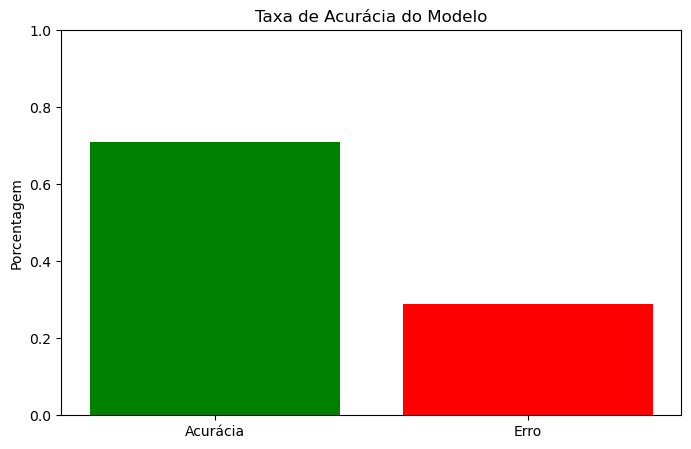

In [85]:
plt.figure(figsize=(8, 5))
plt.bar(['Acurácia', 'Erro'], [taxa_acerto, 1 - taxa_acerto], color=['green', 'red'])
plt.title('Taxa de Acurácia do Modelo')
plt.ylabel('Porcentagem')
plt.ylim(0, 1)
plt.show()

In [87]:
novo_credito = pd.read_csv("NovoCredit.csv")
novo_credito.shape

(1, 20)

In [89]:
novo_credito = novo_credito.iloc[:, 0:20].values

colunas_categoricas = [0, 2, 3, 5, 6, 8, 9, 11, 13, 14, 16, 18, 19]

for coluna in colunas_categoricas:
    novo_credito[:, coluna] = labelencoder.fit_transform(novo_credito[:, coluna])

In [91]:
naive_bayes.predict(novo_credito)

array(['good'], dtype='<U4')